#### CodeAlpha Internship Task 1: Iris Flower Classification 

**Importing Dependencies**

In [117]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

**Data Collection**

In [118]:
# Loading the dataset into a pandas dataframe
iris_df = pd.read_csv("Iris.csv")

In [119]:
# Printing the first five rows of the dataset
iris_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [120]:
# Getting some info about the dataset
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [121]:
# Getting the number of rows and columns of the dataset
iris_df.shape

(150, 6)

In [122]:
# Checking for null values
iris_df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [123]:
# Statistical measures of the data
iris_df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


**Data Visualization**

In [124]:
# Getting the various species of the iris dataset
iris_df["Species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [125]:
# Displaying the species using a pie chart
px.pie(iris_df, names="Species", title="Species Distribution", hole=0.5)

In [126]:
# Comparing SepalLengthCm and SepalWidthCm using a scatter plot
px.scatter(iris_df, x="SepalLengthCm", y="SepalWidthCm", color="Species")

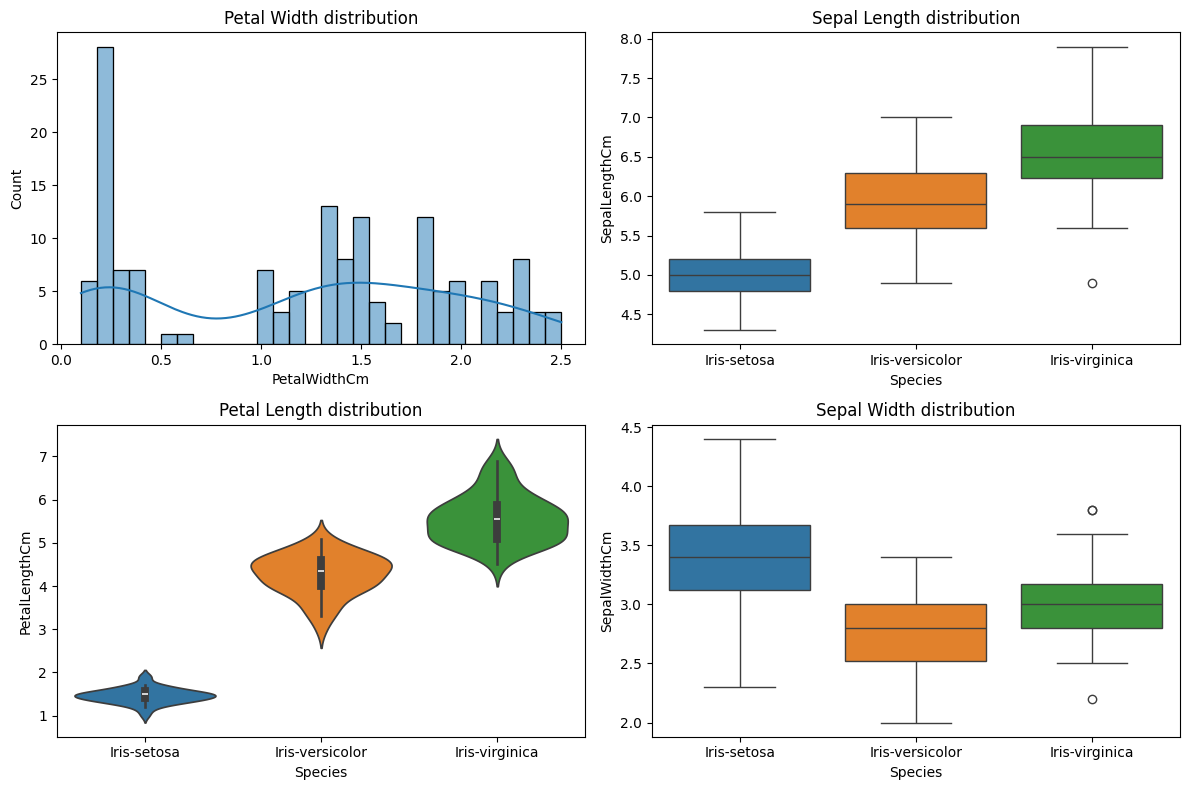

In [127]:
# Some visualizations on distribution of some features
plt.figure(figsize=(12,8))

# Petal Width distribution of species
plt.subplot(2,2,1)
sns.histplot(iris_df, x="PetalWidthCm", kde=True, bins=30)
plt.title("Petal Width distribution")

# Sepal Length distribution
plt.subplot(2,2,2)
sns.boxplot(data=iris_df, x="Species", y="SepalLengthCm", hue="Species")
plt.title("Sepal Length distribution")

# Petal Length distribution
plt.subplot(2,2,3)
sns.violinplot(data=iris_df, x="Species", y="PetalLengthCm", hue="Species")
plt.title("Petal Length distribution")

# Sepal Width distribution
plt.subplot(2,2,4)
sns.boxplot(data=iris_df, x="Species", y="SepalWidthCm", hue="Species")
plt.title("Sepal Width distribution")

plt.tight_layout()
plt.show()

**Correlation**

In [128]:
correlation = iris_df.corr()
correlation

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


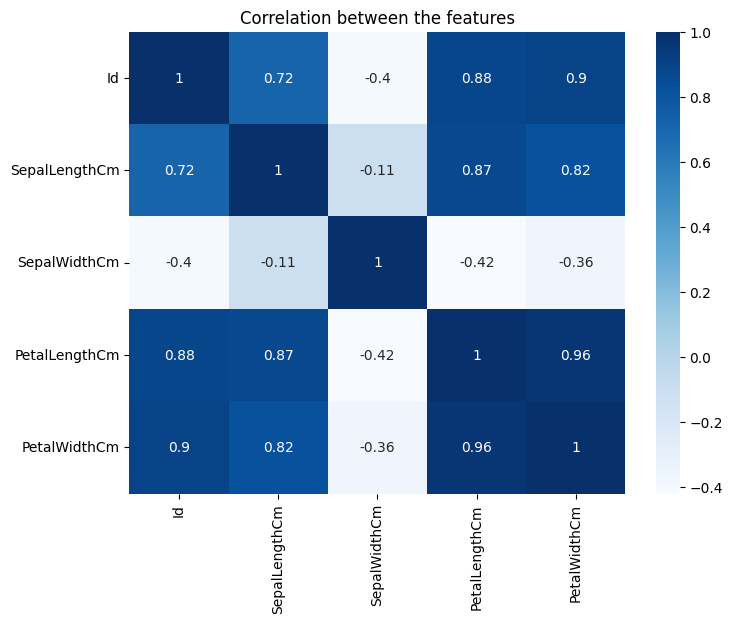

In [129]:
# Constructing the heatmap to understand the correlation between the features
plt.figure(figsize=(8,6))
sns.heatmap(correlation, cbar=True, annot=True, cmap="Blues")
plt.title("Correlation between the features")
plt.show()

**Train Test Split**

In [130]:
# Splitting the data into features and target
X = iris_df.drop(columns=["Id", "Species"])
Y = iris_df["Species"]

In [131]:
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [132]:
# Scaling the features using StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [133]:
X

array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
      

In [134]:
Y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

In [135]:
target_list = Y.unique().tolist()
# target_list

In [136]:
# Transform the target variable Y using LabelEncoder
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
Y_encoded = encoder.fit_transform(Y)

In [137]:
encode_list = Y_encoded.tolist()
encode_list = list(set(encode_list))

In [138]:
# Mapping the species 
for x, y in zip(target_list, encode_list):
    print(f"{x} -> {y}")

Iris-setosa -> 0
Iris-versicolor -> 1
Iris-virginica -> 2


In [139]:
# Spltting the data into training and test data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y_encoded, test_size=0.2, random_state=2)

In [140]:
# Importing machine learning algorithms
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [141]:
# Loading the models into a list
models = [LogisticRegression(multi_class="multinomial", solver="lbfgs", max_iter=1000), DecisionTreeClassifier(random_state=42), RandomForestClassifier(n_estimators=100, random_state=42)]

In [142]:
# Importing metrics
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

# Training and evaluating the models
for model in models:
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    print(f"Model: {model.__class__.__name__}\n")
    print(f"Accuracy: {metrics.accuracy_score(Y_test, Y_pred)}")
    print(f"Classification report: {classification_report(Y_test, Y_pred)}")
    print(f"Confusion matrix: {confusion_matrix(Y_test, Y_pred)}")


Model: LogisticRegression

Accuracy: 0.9666666666666667
Classification report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.88      0.93         8
           2       0.89      1.00      0.94         8

    accuracy                           0.97        30
   macro avg       0.96      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30

Confusion matrix: [[14  0  0]
 [ 0  7  1]
 [ 0  0  8]]
Model: DecisionTreeClassifier

Accuracy: 0.9333333333333333
Classification report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.88      0.88      0.88         8
           2       0.88      0.88      0.88         8

    accuracy                           0.93        30
   macro avg       0.92      0.92      0.92        30
weighted avg       0.93      0.93      0.93        30

Confusion matrix: [[1

In [143]:
# Using cross-validation
from sklearn.model_selection import cross_val_score

In [147]:
for model in models:
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    
    accuracy = cross_val_score(model, X, Y, cv=5, scoring="accuracy")
    print(f"{model}: {round(accuracy.mean(), 3)}")
    
    # Selecting the best algorithm based on accuracy
    best_score = 0
    if accuracy.mean() > best_score:
        best_score = accuracy.mean()
        best_model = (model, best_score)
print()
print(f"Best model: {best_model[0]} with accuracy: {round(best_model[1], 3)}")

LogisticRegression(max_iter=1000, multi_class='multinomial'): 0.96
DecisionTreeClassifier(random_state=42): 0.953
RandomForestClassifier(random_state=42): 0.96

Best model: RandomForestClassifier(random_state=42) with accuracy: 0.96


**Training with the best model**

In [148]:
# Loading and training with the best model
best_model = best_model[0]
best_model.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

In [149]:
# Metrics evaluation with the best model
Y_pred = best_model.predict(X_test)

print(f"Accuracy: {metrics.accuracy_score(Y_test, Y_pred)}")
print(f"Classification report: {classification_report(Y_test, Y_pred)}")

Accuracy: 0.9666666666666667
Classification report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.88      0.93         8
           2       0.89      1.00      0.94         8

    accuracy                           0.97        30
   macro avg       0.96      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30



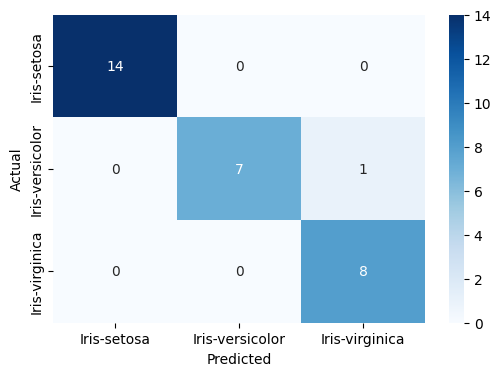

In [150]:
# Plotting the confusion matrix
cm = confusion_matrix(Y_test, Y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=target_list, yticklabels=target_list)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

**Making a predictive system**

In [151]:
# Define input data for prediction
input_data = (6.1,2.8,4.0,1.3)

# Changing the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# Reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# Making a prediction
prediction = best_model.predict(input_data_reshaped)
print(f"The predicted species is: {target_list[prediction[0]]}")

The predicted species is: Iris-virginica
